In [284]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [285]:
iris = datasets.load_iris()

Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$


1. Para tener una vision general de los datos analiza lo que contiene la clave DESCR del dataset.

In [286]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Construye un dataframe:

- los datos se pueden encontrar con la clave "data".
- los nombres de las caracteristicas con la clave: "names_features"
- La clave target nos permite indentificar el tipo de datos.

In [287]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



3. Cambia el nombre de las columnas del dataframe.

In [288]:
columns_name = ["".join([c.capitalize() for c in col.split()]) for col in df.columns]
columns_name = [col.replace("(", "_") for col in columns_name]
cols = [col.replace(")", "") for col in columns_name]
df.columns = cols

df.head()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


4. Analizar el dataframe, numeros de datos, cantidad de null, descripción del dataframe.

Número de datos:

In [289]:
df.shape

(150, 5)

Cantidad de null:

In [290]:
df.isnull().sum()

,0
SepalLength_cm,0
SepalWidth_cm,0
PetalLength_cm,0
PetalWidth_cm,0
Species,0


Descripción del dataframe:

In [291]:
df.describe()

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


5. Aplica estadística básica y construye graficas para entender el dataset. Encuentra la matriz de correlacion.

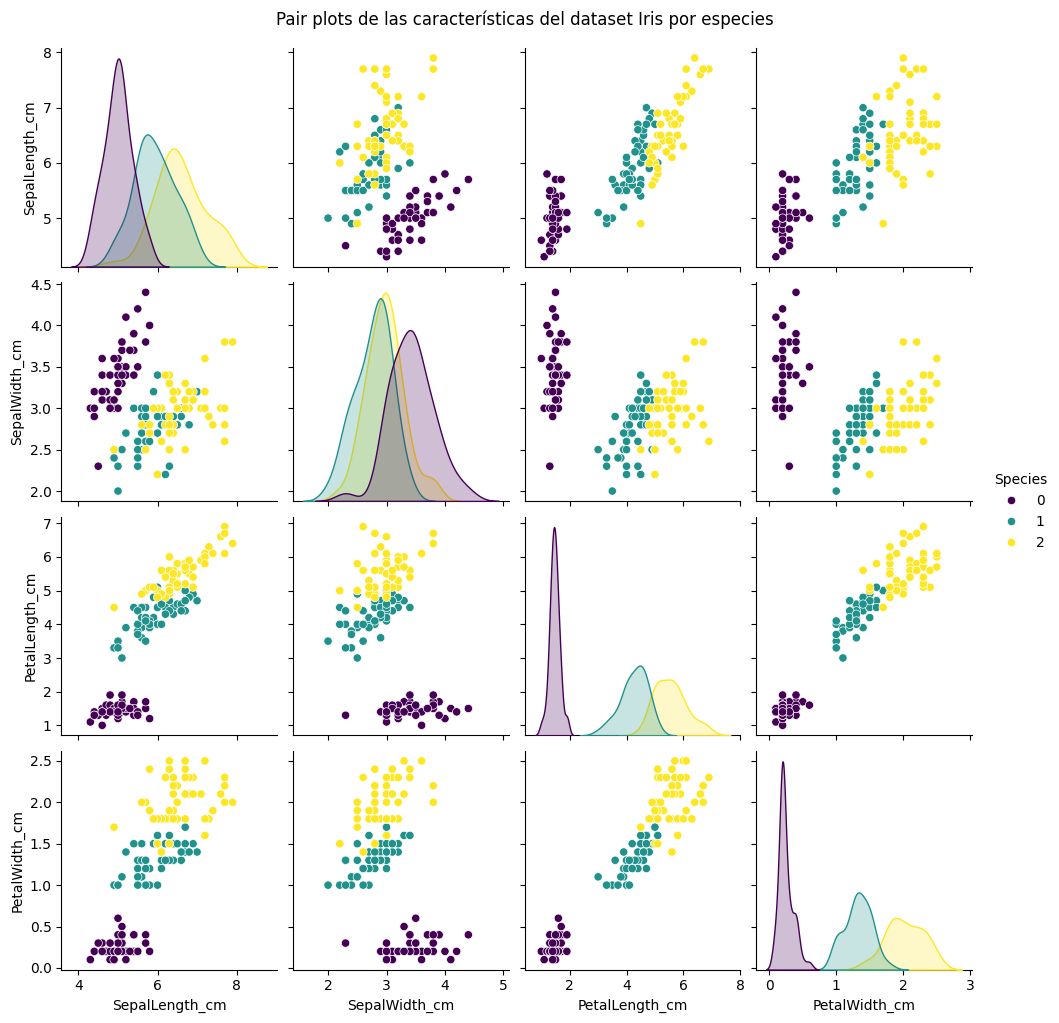

In [292]:
sns.pairplot(df, hue='Species', palette='viridis')
plt.suptitle('Pair plots de las características del dataset Iris por especies', y=1.02)
plt.show()

6. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

Matriz de correlación:

In [293]:
correlation_matrix = df.corr(numeric_only=True)

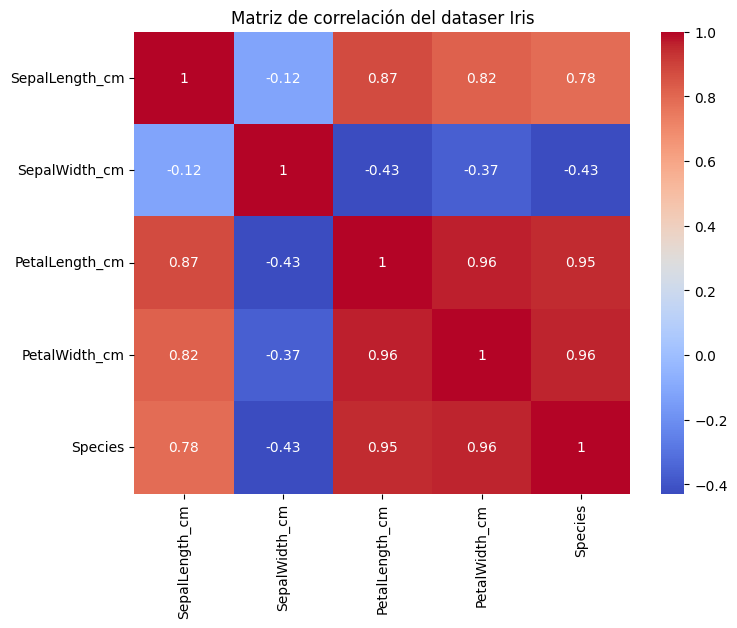

In [294]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación del dataser Iris')
plt.show()

7. Separar los datos en datos de entramiento y test, prueba la siguiente instruccion:

¿Cómo se estan seprando los datos?

In [295]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Species"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

Shape del conjunto de entrenamiento y de prueba:

In [296]:
strat_train_set.shape, strat_test_set.shape

((120, 5), (30, 5))

Distribución de especies en el dataset:

In [297]:
df['Species'].value_counts(normalize=True)

,proportion
Species,
0,0.333333
1,0.333333
2,0.333333


Distribución de especies en el conjunto de entrenamiento

In [298]:
strat_train_set['Species'].value_counts(normalize=True)

,proportion
Species,
0,0.333333
2,0.333333
1,0.333333


Distribución de especies en el conjunto de prueba

In [299]:
display(strat_test_set['Species'].value_counts(normalize=True))

,proportion
Species,
0,0.333333
2,0.333333
1,0.333333


8. Construye un modelo empleando una regresión logística, para clasificar la clase setosa y no setosa, emplea la libreria sklearn.

Se crean los targets:

In [300]:
y_train_setosa = (strat_train_set['Species'] == 0).astype(int)
y_test_setosa = (strat_test_set['Species'] == 0).astype(int)

Se preparan las características para el entrenamiento y prueba:

In [301]:
X_train = strat_train_set.drop('Species', axis=1)
X_test = strat_test_set.drop('Species', axis=1)

Se inicializa el modelo de regresión logística:

In [302]:
log_reg_setosa = LogisticRegression(solver='liblinear', random_state=69)

Se entrena el modelo:

In [303]:
log_reg_setosa.fit(X_train, y_train_setosa)

LogisticRegression(random_state=69, solver='liblinear')

Se realizan las predicciones en el conjunto de prueba:

In [304]:
y_pred_setosa = log_reg_setosa.predict(X_test)

**Se evalua el modelo**

Precisión de la clasificación setosa vs no setosa:

In [305]:
accuracy_setosa = accuracy_score(y_test_setosa, y_pred_setosa)
accuracy_setosa

1.0

Reporte de la clasificación setosa vs no setosa:

In [306]:
report_setosa = classification_report(y_test_setosa, y_pred_setosa)
print(report_setosa)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



9. Determine  la frontera de clasificación:

Para esto, se entrena u modelo usando solo una característica. Se usa `PetalLength_cm` ya que es un buen discriminativo para setosa.

In [307]:
X_train = X_train[['PetalLength_cm']]
X_test = X_test[['PetalLength_cm']]

Se inicializa y entrena el modelo:

In [308]:
log_reg_setosa = LogisticRegression(solver='liblinear', random_state=69)
log_reg_setosa.fit(X_train, y_train_setosa)

LogisticRegression(random_state=69, solver='liblinear')

Se general valores nuevos para `PetalLength_cm` dentro de un rango relevante:

In [309]:
X_new = np.linspace(-10, 10, 1000).reshape(-1, 1)

Se obtienen las probabilidades:

In [310]:
prob = log_reg_setosa_1d.predict_proba(X_new)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Se encuentra la frontera de clasificación:

In [311]:
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
decision_boundary # cm

array([2.47247247])

10. Encontrar una gráfica de la regresión logística  con los valores de probabilidad

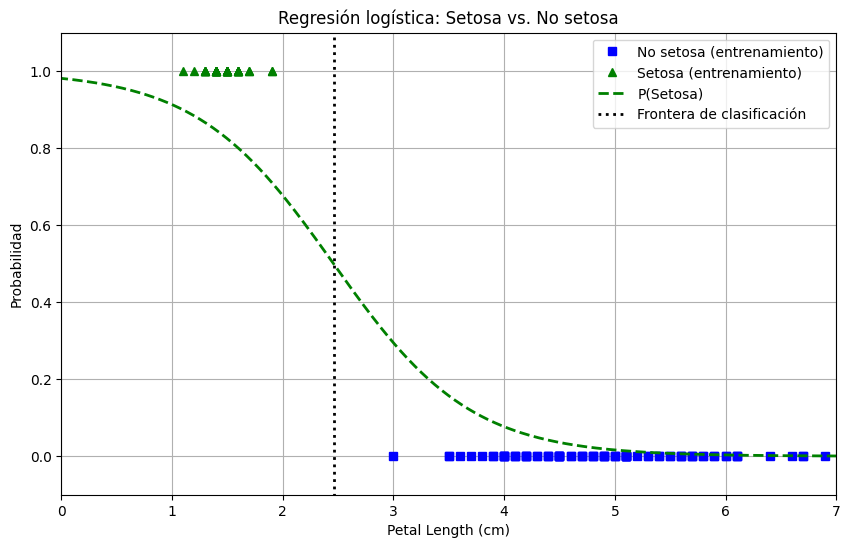

In [312]:
plt.figure(figsize=(10, 6))

plt.plot(X_train_1d[y_train_setosa == 0], y_train_setosa[y_train_setosa == 0], "bs", label="No setosa (entrenamiento)")
plt.plot(X_train_1d[y_train_setosa == 1], y_train_setosa[y_train_setosa == 1], "g^", label="Setosa (entrenamiento)")

plt.plot(X_new, prob[:, 1], "g--", linewidth=2, label="P(Setosa)")

plt.plot([decision_boundary_1d[0], decision_boundary_1d[0]], [-0.2, 1.2], "k:", linewidth=2, label="Frontera de clasificación")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Probabilidad")
plt.title("Regresión logística: Setosa vs. No setosa")
plt.legend()
plt.axis([0, 7, -0.1, 1.1])
plt.grid()
plt.show()

11. Construye el multiclasificador. Puede emplear los metodos dentro de logistic regresión.

Se preparan las características del conjunto de entrenamiento y prueba:

In [313]:
X_train = strat_train_set.drop('Species', axis=1)
X_test = strat_test_set.drop('Species', axis=1)

Se perapran los targets del conjunto de entrenamiento y prueba:

In [314]:
y_train = strat_train_set['Species']
y_test = strat_test_set['Species']

Se inicializa el modelo de regresión logistica:

In [315]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=69)

Se entrena el modelo:

In [316]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=69,
                   solver='saga')

Se hacen las predicciones en el conjunto de prueba:

In [317]:
y_pred = log_reg.predict(X_test)

**Se evalúa el modelo**

Precisión del modelo:

In [318]:
accuracy = accuracy_score(y_test, y_pred)

Reporte del modelo:

In [319]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



12. Dado `X = [4.9, 5.0, 1.8, 0.3]` asociados a todas las caracteristicas, ¿cuál es la probabilidad de que la flor sea setosa, versicolor o virginica?

Se da:

In [320]:
X = np.array([[4.9, 5.0, 1.8, 0.3]])

In [321]:
features = ['SepalLength_cm', 'SepalWidth_cm', 'PetalLength_cm', 'PetalWidth_cm']
X_df = pd.DataFrame(X, columns=features)

Se obtienen las probabilidades:

In [322]:
probabilities = log_reg.predict_proba(X_new_df)

Las probabilidades son:

In [323]:
print(f"Probabilidades para X = {X[0]}:")
print(f"  P(Species=0, Setosa):    {probabilities[0][0]:.4f}")
print(f"  P(Species=1, Versicolour): {probabilities[0][1]:.4f}")
print(f"  P(Species=2, Virginica): {probabilities[0][2]:.4f}")

Probabilidades para X = [4.9 5.  1.8 0.3]:
  P(Species=0, Setosa):    0.9961
  P(Species=1, Versicolour): 0.0039
  P(Species=2, Virginica): 0.0000
